In [1]:
%load_ext autoreload
%autoreload 2

import os, sys, time
import glob

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

#needed to import utils.py
sys.path.append('../') 

import utils
import utils_preprocessing
import utils_exec_models
import utils_exec_models_new

import numpy as np
import pandas as pd
#to view entire text of the comuns
pd.set_option('display.max_colwidth', None) 

import sklearn as sk

import matplotlib.pyplot as plt
import seaborn as sns


# Get all results CSV file

In [13]:
path = os.path.abspath('0_exec_results_py')


results_by_algorithm = []

for root, folders, files in os.walk(path, topdown=False):

    for name in files:
        if name.endswith('.csv'):

            aux = name.replace('.csv', '').replace('performance__','').split('__')
            algo = aux[0]
            feat = aux[1]
            scen = aux[2]
            es_algo = aux[3] if len(aux) == 4 else ''

            results_by_algorithm.append(
                [algo, feat, scen, es_algo, os.path.join(root, name)]
            )



# print(results_by_algorithm)


# Get the performance for each $scenario$ and $features$

In [14]:
df_all = None

for algorithm, features, scenario, es_algorithm, csv_file in results_by_algorithm:
#     utils.print_string_with_separators(f'{scenario} - {features}')
    df_temp = utils.read_csv(csv_file=csv_file)

    #sort performances
    df_temp = utils_exec_models_new.sort_performances_results(df=df_temp)    

#     # get first 3 results
    df_temp = df_temp.head(3)
#     display(df_temp)

    # acumulate the performances
    if df_all is None:
        df_all = df_temp
    else:
        df_all = pd.concat([df_all, df_temp])

    
df_all = utils_exec_models_new.sort_performances_results(df=df_all).reset_index(drop=True)    
display(df_all.head(25))

,Scenario,Features,Model,balanced_accuracy,sensitivity,specificity,f1_score,AUC,accuracy,precision,...,Estimator_Class,Estimator_Hyperparams,fit_time,train_balanced_accuracy,train_sensitivity,train_specificity,train_f1_score,train_AUC,train_accuracy,train_precision
0,Ensemble_Imbalance,All_Features,Balanced Bagging,0.88,0.96,0.81,0.57,0.94,0.82,0.40,...,DecisionTreeClassifier,"{'ccp_alpha':0.0,'class_weight':'balanced','criterion':'gini','max_depth':4,'max_features':None,'max_leaf_nodes':None,'min_impurity_decrease':0.0,'min_samples_leaf':1,'min_samples_split':2,'min_weight_fraction_leaf':0.0,'random_state':42,'splitter':'best'}",0.01,0.80,0.74,0.85,0.54,0.89,0.84,0.43
1,Ensemble_Imbalance,All_Features,Balanced Bagging,0.88,0.96,0.81,0.57,0.94,0.82,0.40,...,DecisionTreeClassifier,"{'ccp_alpha':0.0,'class_weight':'balanced','criterion':'gini','max_depth':4,'max_features':None,'max_leaf_nodes':None,'min_impurity_decrease':0.0,'min_samples_leaf':1,'min_samples_split':2,'min_weight_fraction_leaf':0.0,'random_state':42,'splitter':'best'}",0.01,0.80,0.74,0.85,0.54,0.89,0.84,0.43
2,Ensemble_Imbalance,All_Features,Balanced Bagging,0.88,0.91,0.84,0.59,0.94,0.85,0.43,...,DecisionTreeClassifier,"{'ccp_alpha':0.0,'class_weight':'balanced','criterion':'gini','max_depth':5,'max_features':None,'max_leaf_nodes':None,'min_impurity_decrease':0.0,'min_samples_leaf':1,'min_samples_split':2,'min_weight_fraction_leaf':0.0,'random_state':42,'splitter':'best'}",0.01,0.81,0.76,0.87,0.57,0.90,0.85,0.46
3,Ensemble_Imbalance,All_Features,Balanced Bagging,0.87,0.96,0.79,0.55,0.94,0.81,0.38,...,MLPClassifier,"{'activation':'tanh','alpha':0.1,'batch_size':'auto','beta_1':0.9,'beta_2':0.999,'early_stopping':False,'epsilon':1e-08,'hidden_layer_sizes':30,'learning_rate':'adaptive','learning_rate_init':0.7,'max_fun':15000,'max_iter':2000,'momentum':0.9,'n_iter_no_change':10,'nesterovs_momentum':True,'power_t':0.5,'random_state':42,'shuffle':True,'solver':'adam','tol':0.0001,'validation_fraction':0.1,'verbose':False,'warm_start':False}",0.02,0.83,0.81,0.85,0.58,0.91,0.85,0.45
4,Ensemble_Imbalance,All_Features,Balanced Bagging,0.87,0.96,0.79,0.55,0.94,0.81,0.38,...,MLPClassifier,"{'activation':'tanh','alpha':0.1,'batch_size':'auto','beta_1':0.9,'beta_2':0.999,'early_stopping':False,'epsilon':1e-08,'hidden_layer_sizes':30,'learning_rate':'adaptive','learning_rate_init':0.7,'max_fun':15000,'max_iter':2000,'momentum':0.9,'n_iter_no_change':10,'nesterovs_momentum':True,'power_t':0.5,'random_state':42,'shuffle':True,'solver':'adam','tol':0.0001,'validation_fraction':0.1,'verbose':False,'warm_start':False}",0.02,0.83,0.81,0.85,0.58,0.91,0.85,0.45
5,Ensemble_Imbalance,All_Features,Balanced Bagging,0.87,0.96,0.78,0.53,0.93,0.80,0.37,...,MLPClassifier,"{'activation':'tanh','alpha':0.1,'batch_size':'auto','beta_1':0.9,'beta_2':0.999,'early_stopping':False,'epsilon':1e-08,'hidden_layer_sizes':30,'learning_rate':'adaptive','learning_rate_init':0.7,'max_fun':15000,'max_iter':2000,'momentum':0.9,'n_iter_no_change':10,'nesterovs_momentum':True,'power_t':0.5,'random_state':42,'shuffle':True,'solver':'adam','tol':0.0001,'validation_fraction':0.1,'verbose':False,'warm_start':False}",0.01,0.82,0.81,0.83,0.56,0.91,0.83,0.43
6,Ensemble_Imbalance,All_Features,Balanced Bagging,0.87,0.94,0.81,0.56,0.93,0.82,0.40,...,SVC,"{'C':3,'break_ties':False,'cache_size':200,'class_weight':'balanced','coef0':0.0,'decision_function_shape':'ovr','degree':3,'gamma':'auto','kernel':'rbf','max_iter':-1,'probability':True,'random_state':42,'shrinking':True,'tol':0.001,'verbose':False}",0.35,0.83,0.81,0.85,0.58,0.91,0.84,0.45
7,Ensemble_Imbalance,All_Features,Balanced Bagging,0.87,0.94,0.81,0.56,0.93,0.82,0.40,...,SVC,"{'C':3,'break_ties':False,'cache_size':200,'class_weight':'balanced','coef0':0.0,'decision_function_shape':'ovr','degree':3,'gamma':'auto','kernel':'rbf','max_iter':-1,'probability':True,'random_state':42,'shrinking':True,'tol':0.001,'verbose':False}",0.35,0.83,0.81,0.85,0.58,0.91,0.84,0.45

In [15]:
df_all.fillna('', inplace=True)

df_all['Algorithm'] = df_all.Estimator_Class + ' ' + df_all.Model_Class    
df_all.Algorithm = df_all.Algorithm.str.replace('BalancedBagging', '').str.replace('Classifier', '').str.strip()


df_all.sort_values(by=['Algorithm'], inplace=True)

df_all[['Algorithm', 'Estimator', 'Model', 'Model_Class', 'Estimator_Class']].head(9)

,Algorithm,Estimator,Model,Model_Class,Estimator_Class
35,ComplementNB,Naïve Bayes,Balanced Bagging,BalancedBaggingClassifier,ComplementNB
36,ComplementNB,Naïve Bayes,Balanced Bagging,BalancedBaggingClassifier,ComplementNB
57,ComplementNB,,Naïve Bayes,ComplementNB,
56,ComplementNB,,Naïve Bayes,ComplementNB,
55,ComplementNB,,Naïve Bayes,ComplementNB,
54,ComplementNB,Naïve Bayes,Balanced Bagging,BalancedBaggingClassifier,ComplementNB
53,ComplementNB,Naïve Bayes,Balanced Bagging,BalancedBaggingClassifier,ComplementNB
52,ComplementNB,Naïve Bayes,Balanced Bagging,BalancedBaggingClassifier,ComplementNB
37,ComplementNB,Naïve Bayes,Balanced Bagging,BalancedBaggingClassifier,ComplementNB


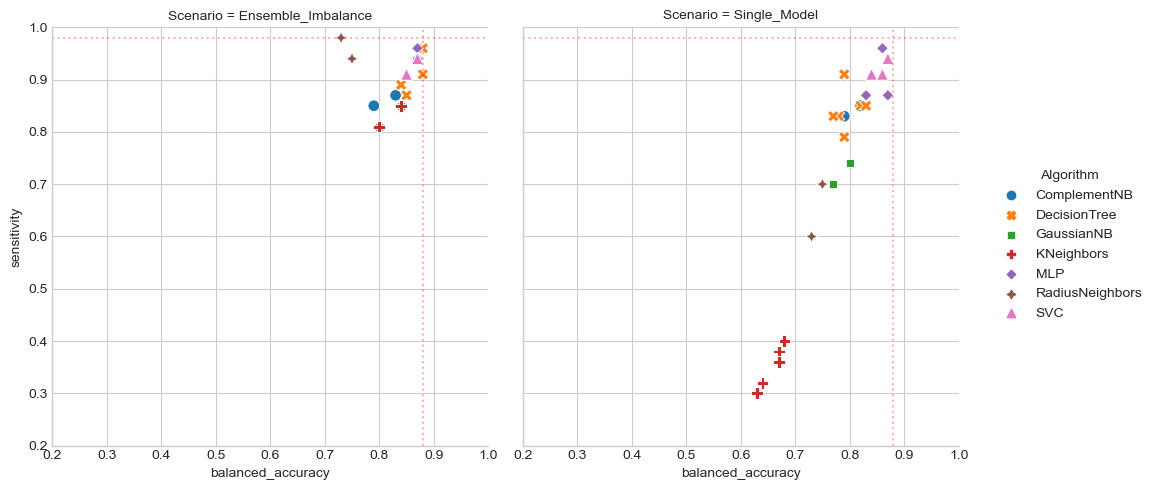

In [16]:
g = sns.relplot(
    data=df_all, 
    x="balanced_accuracy", 
    y="sensitivity",
    col="Scenario", 
    hue="Algorithm", 
    style="Algorithm",
    kind="scatter",
    s=70
)
plt.ylim(0.20, 1.0)
plt.xlim(0.20, 1.0)

g.refline(y=df_all.sensitivity.max(), linestyle=":", c='red', alpha=0.3, label='')
g.refline(x=df_all.balanced_accuracy.max(), linestyle=":", c='red', alpha=0.3)


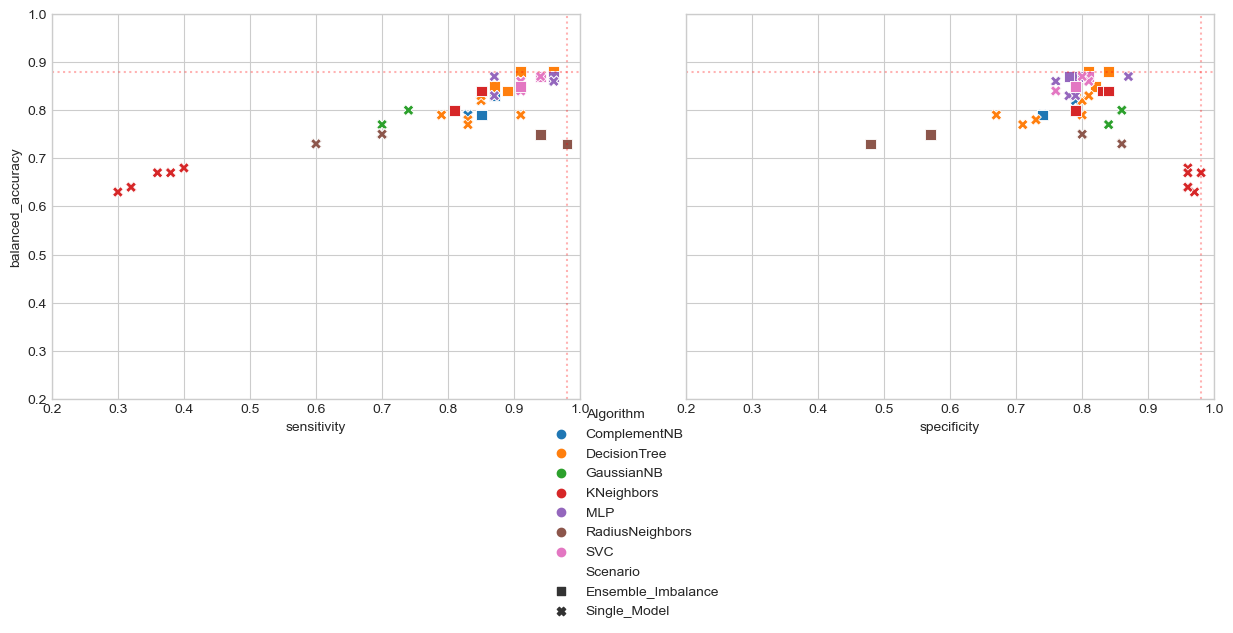

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(15,5), sharey=True)

g = sns.scatterplot(
    ax=axs[0],
    data=df_all, 
    x="sensitivity", 
    y="balanced_accuracy", 
    hue="Algorithm", 
    style="Scenario",
    markers={"Single_Model": "X", "Ensemble_Imbalance": "s"},
    s=60,
    legend=False,
)
axs[0].set_ylim(0.2, 1.0)
axs[0].set_xlim(0.2, 1.0)

axs[0].axvline(x=df_all.sensitivity.max(), linestyle=":", c='red', alpha=0.3)
axs[0].axhline(y=df_all.balanced_accuracy.max(), linestyle=":", c='red', alpha=0.3)


sns.scatterplot(
    ax=axs[1],
    data=df_all, 
    x="specificity", 
    y="balanced_accuracy", 
    hue="Algorithm", 
    style="Scenario",
    markers={"Single_Model": "X", "Ensemble_Imbalance": "s"},
    s=60,
)
axs[1].set_ylim(0.2, 1.0)
axs[1].set_xlim(0.2, 1.0)

axs[1].axvline(x=df_all.specificity.max(), linestyle=":", c='red', alpha=0.3)
axs[1].axhline(y=df_all.balanced_accuracy.max(), linestyle=":", c='red', alpha=0.3)

plt.legend(loc='lower center', bbox_to_anchor=(-0.1, -0.6))


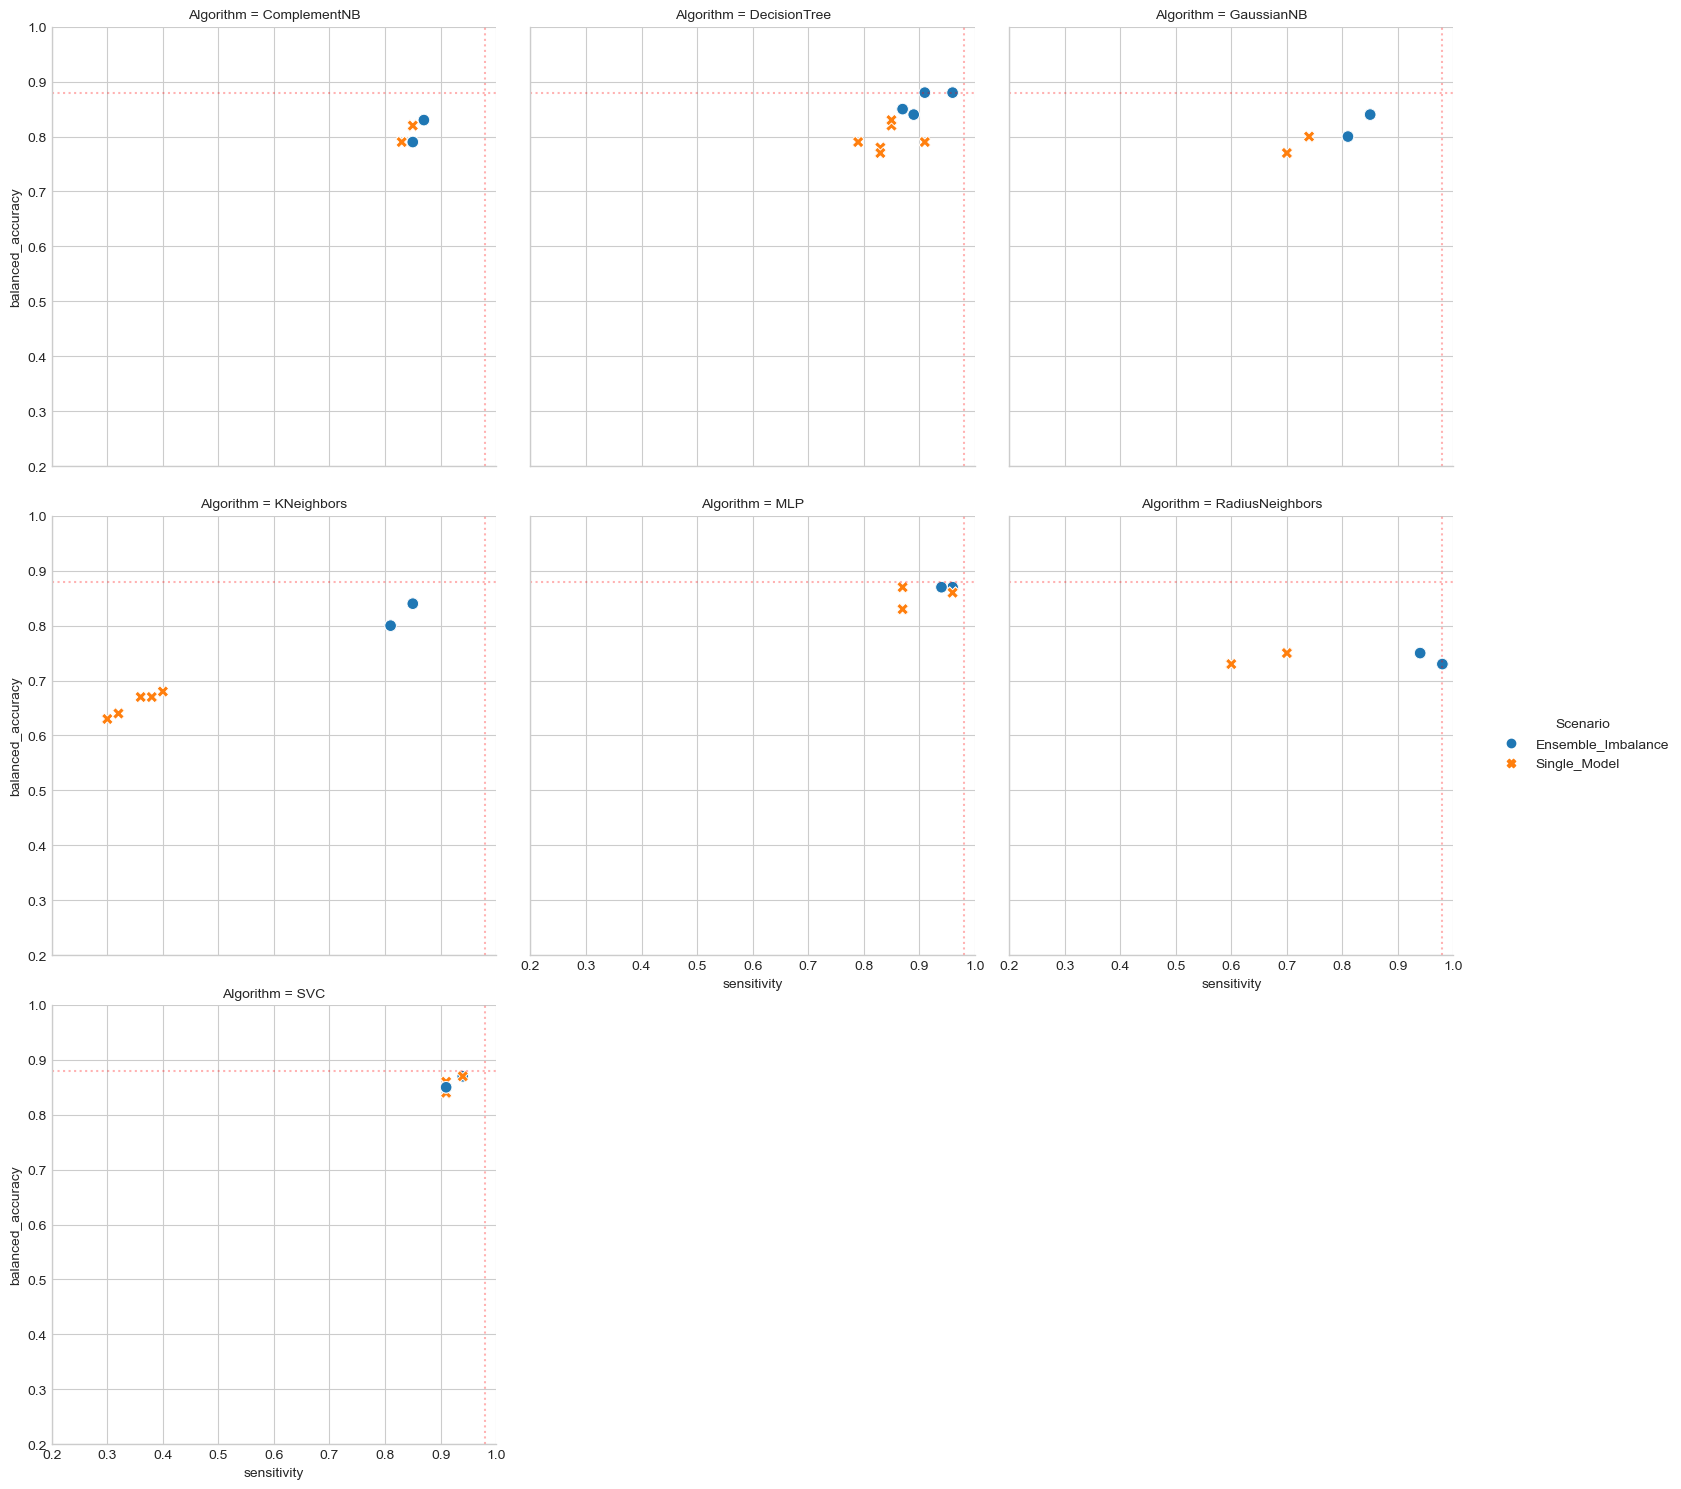

In [57]:
g = sns.relplot(
    data=df_all, 
    y="balanced_accuracy", 
    x="sensitivity",
    hue="Scenario", 
    col="Algorithm", 
    style="Scenario",
    kind="scatter",
    s=70,
    col_wrap=3,
)
plt.ylim(0.20, 1.0)
plt.xlim(0.20, 1.0)

g.refline(x=df_all.sensitivity.max(), linestyle=":", c='red', alpha=0.3, label='')
g.refline(y=df_all.balanced_accuracy.max(), linestyle=":", c='red', alpha=0.3)


ValueError: Unable to coerce to Series, length must be 2: given 39

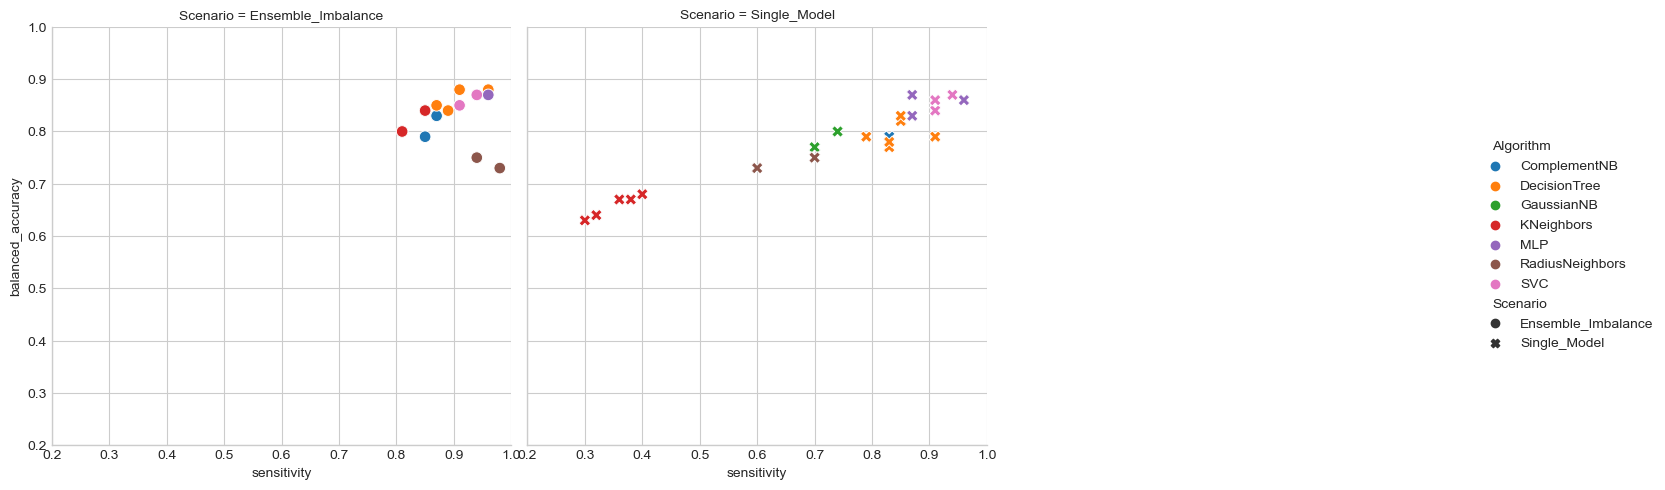

In [60]:
g = sns.relplot(
    data=df_all.groupby(by=['Algorithm','Scenario','balanced_accuracy','sensitivity',]).first(), 
    y="balanced_accuracy", 
    x="sensitivity",
    hue="Algorithm", 
    col="Scenario", 
    style="Scenario",
    kind="scatter",
    s=70,
    col_wrap=3,
)
plt.ylim(0.20, 1.0)
plt.xlim(0.20, 1.0)

g.refline(x=df_all.sensitivity.max(), linestyle=":", c='red', alpha=0.3, label='')
g.refline(y=df_all.balanced_accuracy.max(), linestyle=":", c='red', alpha=0.3)


In [68]:
df_aux = df_all.sort_values(by=['Algorithm','Scenario','balanced_accuracy','sensitivity','specificity'], 
                            ascending=[True, True, False, False, False]).reset_index().copy()
df_aux = df_aux.groupby(by=['Algorithm','Scenario']).first()
df_aux

index                 Features  \
Algorithm       Scenario                                             
ComplementNB    Ensemble_Imbalance     35             All_Features   
                Single_Model           43             All_Features   
DecisionTree    Ensemble_Imbalance      0             All_Features   
                Single_Model           39             All_Features   
GaussianNB      Ensemble_Imbalance     31             All_Features   
                Single_Model           50             All_Features   
KNeighbors      Ensemble_Imbalance     27             All_Features   
                Single_Model           74             All_Features   
MLP             Ensemble_Imbalance      3             All_Features   
                Single_Model           13             All_Features   
RadiusNeighbors Ensemble_Imbalance     64  without_Diagnosis_Delay   
                Single_Model           67             All_Features   
SVC             Ensemble_Imbalance      6             All_Features   
                Single_Model           12             All_Features   

                                               Model  balanced_accuracy  \
Algorithm       Scenario                                                  
ComplementNB    Ensemble_Imbalance  Balanced Bagging               0.83   
                Single_Model             Naïve Bayes               0.82   
DecisionTree    Ensemble_Imbalance  Balanced Bagging               0.88   
                Single_Model           Decision Tree               0.83   
GaussianNB      Ensemble_Imbalance  Balanced Bagging               0.84   
                Single_Model             Naïve Bayes               0.80   
KNeighbors      Ensemble_Imbalance  Balanced Bagging               0.84   
                Single_Model                    k-NN               0.68   
MLP             Ensemble_Imbalance  Balanced Bagging               0.87   
                Single_Model         Neural Networks               0.87   
RadiusNeighbors Ensemble_Imbalance  Balanced Bagging               0.75   
                Single_Model                    k-NN               0.75   
SVC             Ensemble_Imbalance  Balanced Bagging               0.87   
                Single_Model                     SVM               0.87   

                                    sensitivity  specificity  f1_score   AUC  \
Algorithm       Scenario                                                       
ComplementNB    Ensemble_Imbalance         0.87         0.79      0.51  0.90   
                Single_Model               0.85         0.79      0.50  0.90   
DecisionTree    Ensemble_Imbalance         0.96         0.81      0.57  0.94   
                Single_Model               0.85         0.81      0.53  0.88   
GaussianNB      Ensemble_Imbalance         0.85         0.83      0.54  0.90   
                Single_Model               0.74         0.86      0.53  0.90   
KNeighbors      Ensemble_Imbalance         0.85         0.84      0.56  0.91   
                Single_Model               0.40         0.96      0.48  0.81   
MLP             Ensemble_Imbalance         0.96         0.79      0.55  0.94   
                Single_Model               0.87         0.87      0.61  0.94   
RadiusNeighbors Ensemble_Imbalance         0.94         0.57      0.37  0.81   
                Single_Model               0.70         0.80      0.44  0.77   
SVC             Ensemble_Imbalance         0.94         0.81      0.56  0.93   
                Single_Model               0.94         0.80      0.54  0.93   

                                    accuracy  precision  ...  \
Algorithm       Scenario                                 ...   
ComplementNB    Ensemble_Imbalance      0.80       0.36  ...   
                Single_Model            0.79       0.35  ...   
DecisionTree    Ensemble_Imbalance      0.82       0.40  ...   
                Single_Model            0.82       0.38  ...   
GaussianNB      Ensemble_Imbalance      0.83     

AttributeError: 'Axes' object has no attribute 'refline'

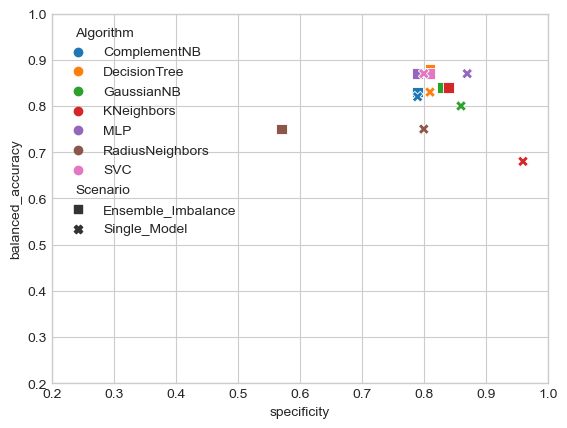

In [70]:
g = sns.scatterplot(
#     ax=axs[1],
    data=df_aux, 
    x="specificity", 
    y="balanced_accuracy", 
    hue="Algorithm", 
    style="Scenario",
    markers={"Single_Model": "X", "Ensemble_Imbalance": "s"},
    s=60,
)

plt.ylim(0.20, 1.0)
plt.xlim(0.20, 1.0)

axs[1].axvline(x=df_all.specificity.max(), linestyle=":", c='red', alpha=0.3)
axs[1].axhline(y=df_all.balanced_accuracy.max(), linestyle=":", c='red', alpha=0.3)

plt.legend(loc='lower center', bbox_to_anchor=(-0.1, -0.6))

[<Axes: title={'center': 'Scenario = Ensemble_Imbalance'}, xlabel='sensitivity', ylabel='balanced_accuracy'>
 <Axes: title={'center': 'Scenario = Single_Model'}, xlabel='sensitivity'>]


<Figure size 1500x500 with 0 Axes>

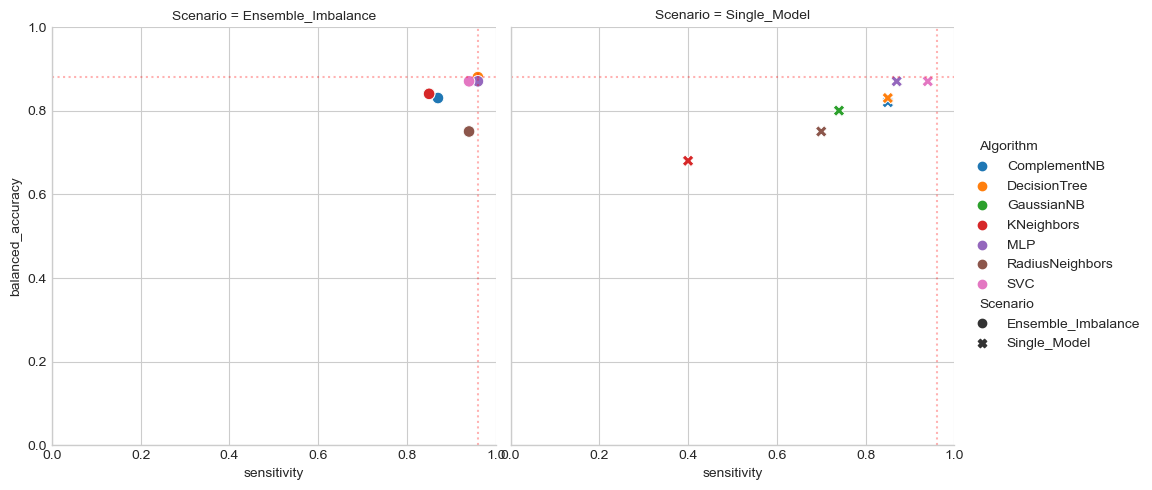

In [104]:
# fig, axs = plt.subplots(1, 2, figsize=(15,5), sharey=True)
fig = plt.figure(figsize=(15,5))
g = sns.relplot(
#     ax=axs,
    data=df_aux, 
    y="balanced_accuracy", 
    x="sensitivity",
    col="Scenario", 
    hue="Algorithm", 
    style="Scenario",
    kind="scatter",
    s=70,
)
plt.ylim(0.0, 1.0)
plt.xlim(0.0, 1.0)

print(g.axes[0])

# plt.axes.refline(y=df_aux.balanced_accuracy.max(), linestyle=":", c='red', alpha=0.3)
for ax in g.axes[0]:
    ax.axhline(y=df_aux.balanced_accuracy.max(), linestyle=":", c='red', alpha=0.3)
    ax.axvline(x=df_aux.sensitivity.max(), linestyle=":", c='red', alpha=0.3)
